In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [2]:
import opendatasets as od
import pandas


od.download(
	"https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

Skipping, found downloaded files in "./heart-attack-analysis-prediction-dataset" (use force=True to force download)


In [3]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

<hr>

__Import Datasets__

In [4]:
#data=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
data1=pd.read_csv("heart-attack-analysis-prediction-dataset/heart.csv")
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
display(data1.describe())
display(data1.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

**Clealy, there are no null values in the dataset as observed above so we don't need to treat any columns for null values.**

<hr>

Let's observe the output variable for the data.

In [6]:
#Classification columns
class_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
class_data=data1[class_cols]

#Continuous columns
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

<hr>

In [7]:
#Divide the data based on sex variable
X=data1[data1["sex"]==1].reset_index()  
Y=data1[data1["sex"]==0].reset_index()   
display(X.head(),Y.head())

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


<hr>

<hr>

In [8]:
X=data1[data1["sex"]==1].reset_index()  #Females
Y=data1[data1["sex"]==0].reset_index()   #Males

HR=data1[data1["output"]==1].reset_index()  #High Risk
LR=data1[data1["output"]==0].reset_index()  #Low Risk

#Calculate general characteristics
print("----------------General Data------------------")
print("Total Age =>")
print("Mean: {}".format(round(data1["age"].mean())))
print("Median: {}".format(round(data1["age"].median())))
print("Variance: {}".format(round(data1["age"].var())))
print("Standard Deviation: {}\n".format(round((data1["age"].std()),3)))

# Calculate gender specific characteristics
print("--------------Gender Specific Data-------------------")
print("For MEN =>")
print("Mean: {}".format(round(Y["age"].mean())))
print("Median: {}".format(round(Y["age"].median())))
print("Variance: {}".format(round(Y["age"].var())))
print("Standard Deviation: {}\n\n".format(round((Y["age"].std()),3)))

print("For WOMEN =>")
print("Mean: {}".format(round(X["age"].mean())))
print("Median: {}".format(round(X["age"].median())))
print("Variance: {}".format(round(X["age"].var())))
print("Standard Deviation: {}\n".format(round((X["age"].std()),3)))

# Calculate output specific characteristics
print("------------------Output Specific Data-----------------------")
print("For High Risk =>")
print("Mean: {}".format(round(HR["age"].mean())))
print("Median: {}".format(round(HR["age"].median())))
print("Variance: {}".format(round(HR["age"].var())))
print("Standard Deviation: {}\n\n".format(round((HR["age"].std()),3)))

print("For Low Risk =>")
print("Mean: {}".format(round(LR["age"].mean())))
print("Median: {}".format(round(LR["age"].median())))
print("Variance: {}".format(round(LR["age"].var())))
print("Standard Deviation: {}".format(round((LR["age"].std()),3)))

----------------General Data------------------
Total Age =>
Mean: 54
Median: 55
Variance: 82
Standard Deviation: 9.082

--------------Gender Specific Data-------------------
For MEN =>
Mean: 56
Median: 57
Variance: 89
Standard Deviation: 9.409


For WOMEN =>
Mean: 54
Median: 54
Variance: 79
Standard Deviation: 8.884

------------------Output Specific Data-----------------------
For High Risk =>
Mean: 52
Median: 52
Variance: 91
Standard Deviation: 9.551


For Low Risk =>
Mean: 57
Median: 58
Variance: 63
Standard Deviation: 7.962


<hr>

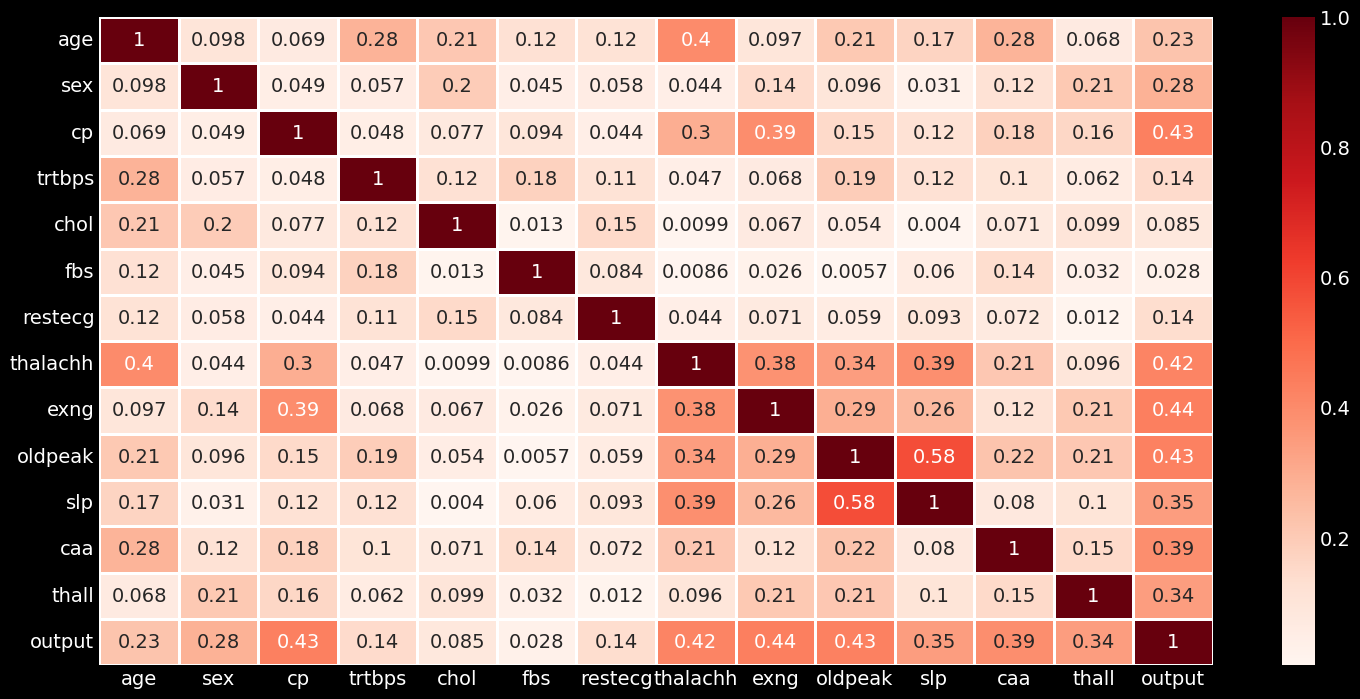

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


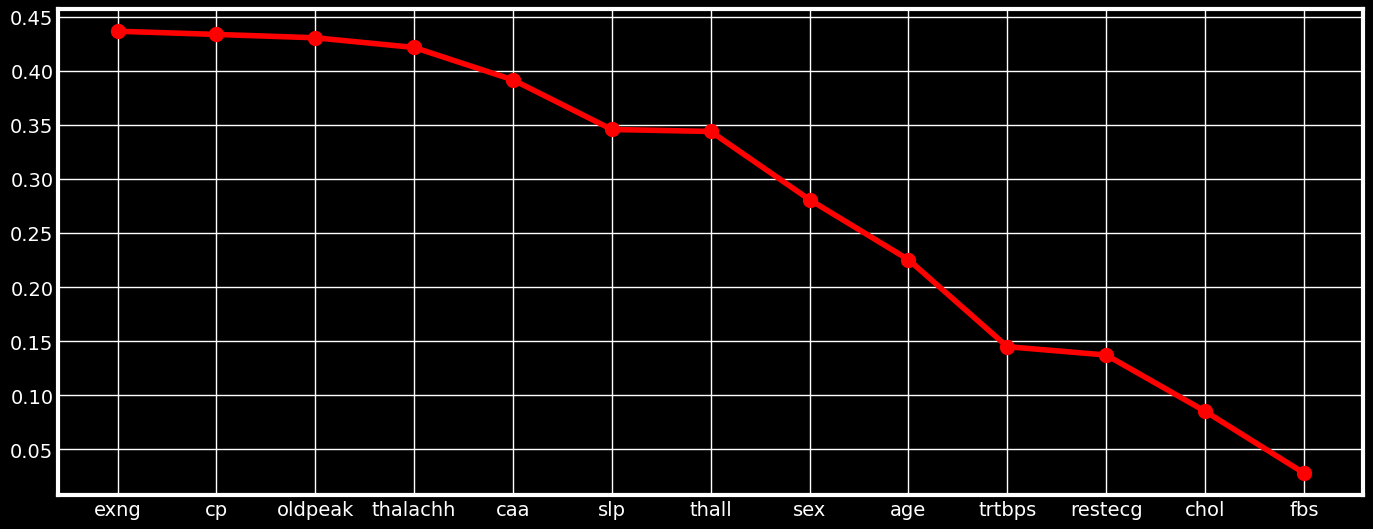

In [9]:
new_df=data1
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

In [10]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


Clearly, there arent many outliners but we still have to try to minimize them as much as we can. We can take the log of these columns to bring all values within a range and minimize the outliners.

In [11]:
#Using log transformation
data1["age"]= np.log(data1.age)
data1["trtbps"]= np.log(data1.trtbps)
data1["chol"]= np.log(data1.chol)
data1["thalachh"]= np.log(data1.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


<hr>

In [12]:
#Data Splitting
X=data1.iloc[:,:13]
from sklearn.model_selection import train_test_split
Y=data1["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 
from sklearn.preprocessing import MinMaxScaler

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

<hr>

In [13]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

In [14]:

from sklearnex import patch_sklearn
patch_sklearn()
import time
start=time.time()
model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_log_time=end-start


model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_log_time),5)} seconds")
print(model_Log_accuracy)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Execution time of model: 0.35423 seconds
90.16000000000001


In [15]:
import time
start=time.time()
from sklearnex import patch_sklearn
patch_sklearn()
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()
model_knn_time=end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_knn_time),5)} seconds")
print(model_KNN_accuracy)

Execution time of model: 0.00655 seconds
88.52000000000001


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [16]:
import time
start=time.time()
from sklearnex import patch_sklearn
patch_sklearn()
model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()
model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
print(model_svm_accuracy)

Execution time of model: 0.00639 seconds
90.16000000000001


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [17]:
import time
start=time.time()
from sklearnex import patch_sklearn
patch_sklearn()
model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()
model_dt_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_dt_time),5)} seconds")
print(model_tree_accuracy)

Execution time of model: 0.00266 seconds
81.97


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [18]:
#Build Model
import time
start=time.time()
from sklearnex import patch_sklearn
patch_sklearn()
model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
print(model_RF_accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Execution time of model: 0.60375 seconds
91.8


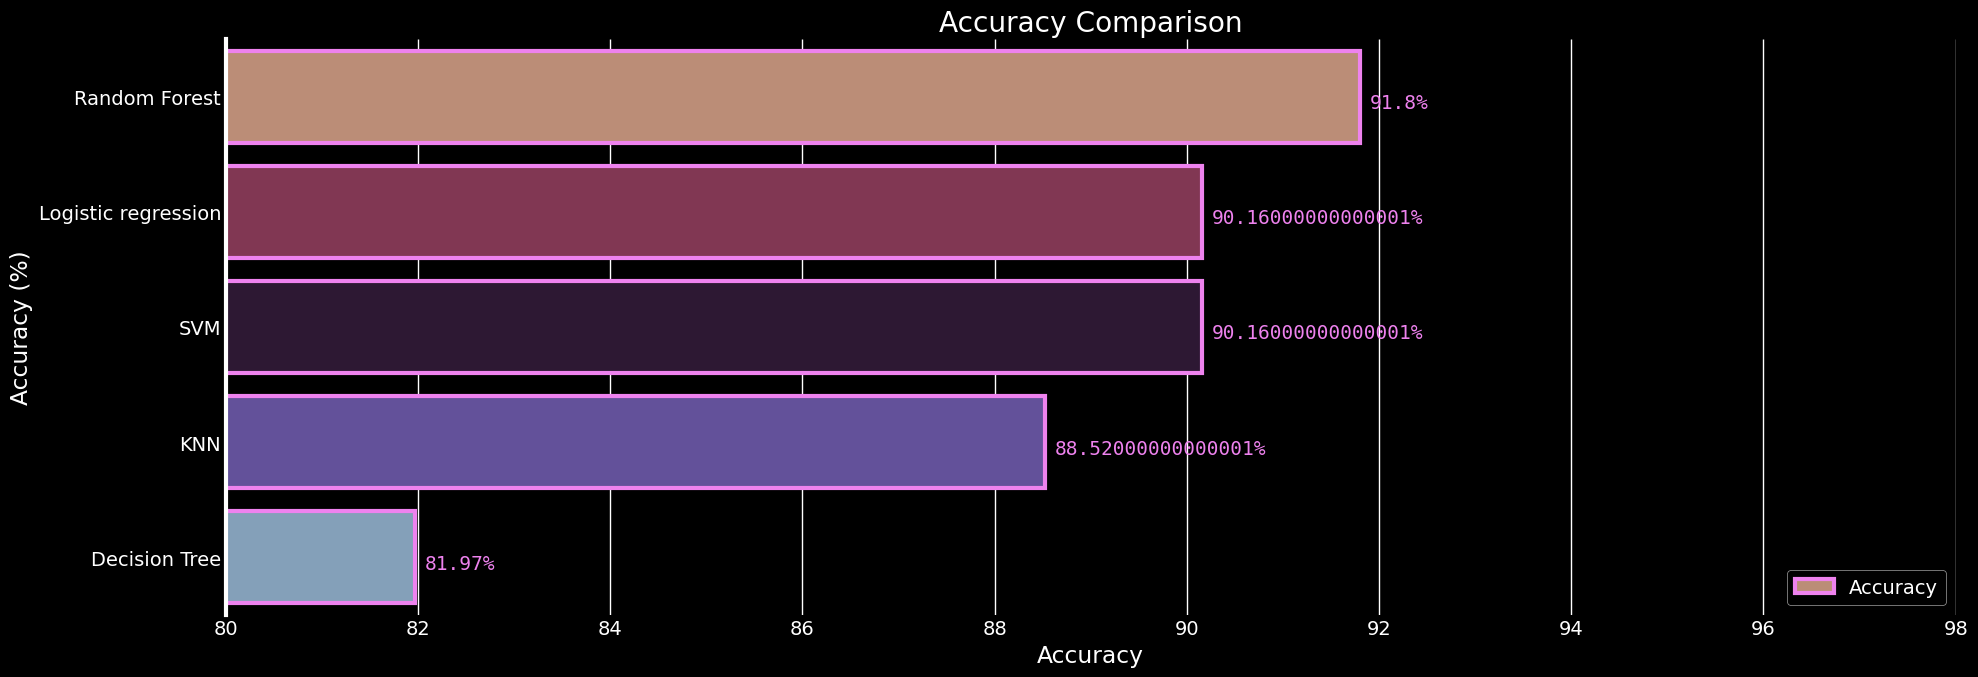

In [19]:
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
           }

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

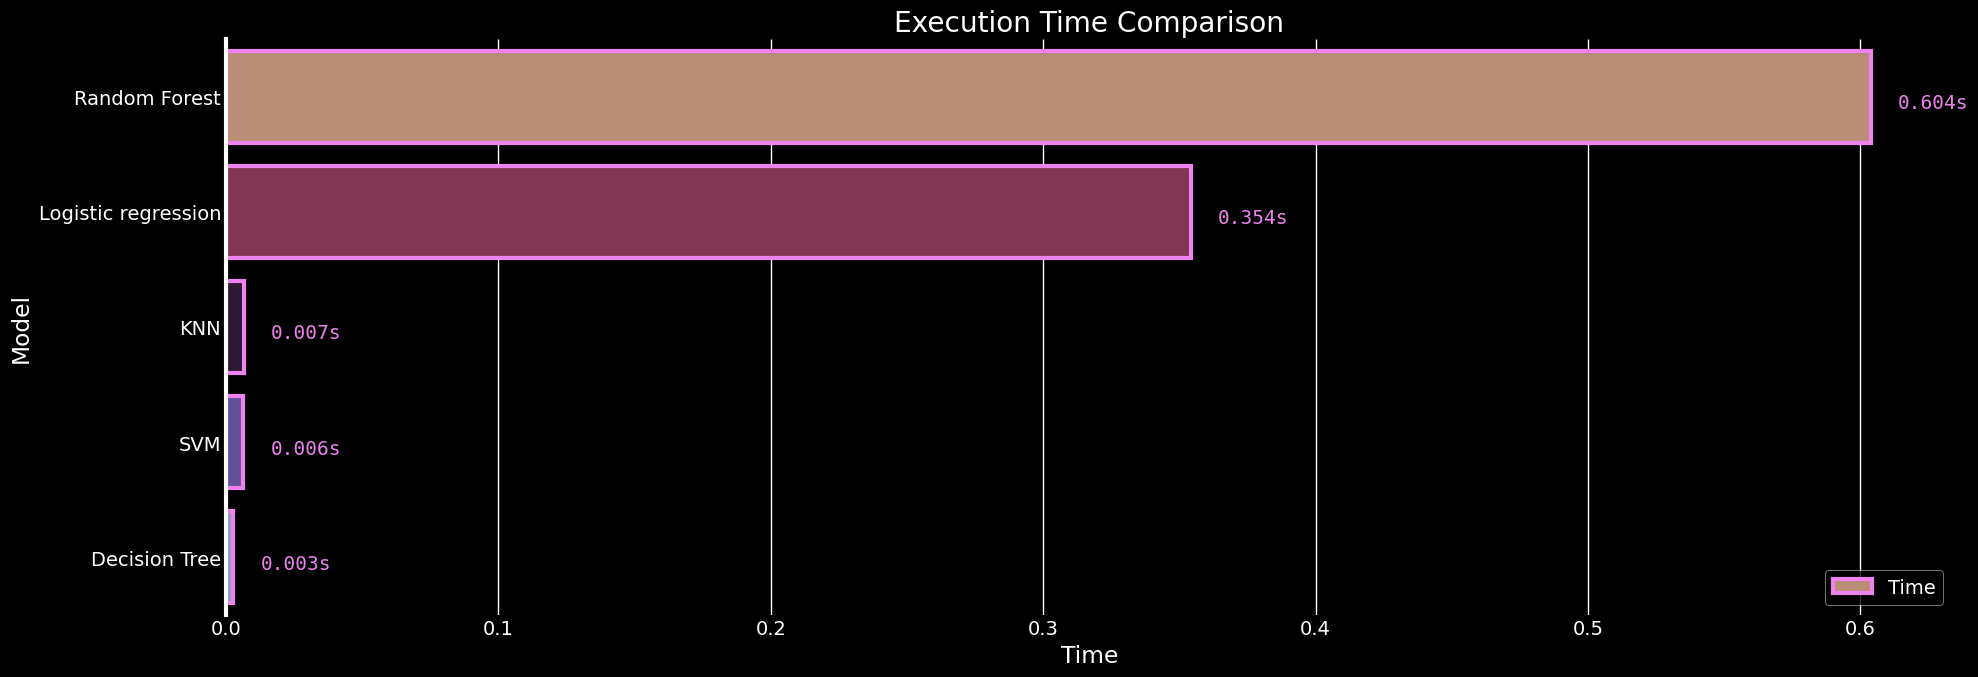

In [20]:
exe_time={"Logistic regression": model_log_time,
            "KNN": model_knn_time,
            "SVM": model_svm_time,
            "Decision Tree": model_dt_time,
            "Random Forest": model_RF_time,
            }

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",edgecolor="violet",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'violet') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()